In [1]:
# Importing and naming packages/libraries to be used
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/California_airbnb.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247859 entries, 0 to 247858
Data columns (total 62 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Date                                          247859 non-null  object 
 1   id                                            247859 non-null  int64  
 2   scrape_id                                     247859 non-null  int64  
 3   name                                          247859 non-null  object 
 4   host_id                                       247859 non-null  int64  
 5   host_since                                    247829 non-null  object 
 6   host_response_time                            201786 non-null  object 
 7   host_response_rate                            201786 non-null  float64
 8   host_acceptance_rate                          208292 non-null  float64
 9   host_is_superhost                             22

In [3]:
# Drop unwanted columns
df = df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'instant_bookable', 'Date', 'id', 'scrape_id', 'name', 'property_type', 'host_id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'latitude', 'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'first_review', 'last_review', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_city', 'host_country', 'Country', 'Zone'], axis=1)


In [4]:
# Check for missing values
df.isnull().sum()

room_type              0
accommodates           0
beds                4472
price               2708
bathrooms_text       153
bedrooms          130031
amenities              2
City                   0
dtype: int64

In [5]:
# Set NAs in bedrooms to median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)

In [6]:
# Set NAs in beds to medians
df['beds'].fillna(df['beds'].median(), inplace=True)

In [7]:
df.isnull().sum()

room_type            0
accommodates         0
beds                 0
price             2708
bathrooms_text     153
bedrooms             0
amenities            2
City                 0
dtype: int64

In [8]:
# Drop NAs
df = df.dropna()

In [9]:
df.isnull().sum()

room_type         0
accommodates      0
beds              0
price             0
bathrooms_text    0
bedrooms          0
amenities         0
City              0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().value_counts()

False    241146
True       3854
Name: count, dtype: int64

In [11]:
# Remove duplicates
df = df.drop_duplicates(keep=False)

In [12]:
df.duplicated().value_counts()

False    239006
Name: count, dtype: int64

In [13]:
# Inidividual Columns

In [14]:
df.price.describe()

count    239006.000000
mean        282.982754
std         974.181128
min           0.000000
25%          95.000000
50%         150.000000
75%         259.000000
max       99999.000000
Name: price, dtype: float64

In [15]:
# price - Dependent variable
df.price.describe().round(1)

count    239006.0
mean        283.0
std         974.2
min           0.0
25%          95.0
50%         150.0
75%         259.0
max       99999.0
Name: price, dtype: float64

In [16]:
# limit values of dataset to reasonable and eliminate outliers
df['price'] = np.where(df['price'] > 400, np.nan, df['price'])
df['price'] = np.where(df['price'] < 19, np.nan, df['price'])


In [17]:
df.price.describe()

count    207968.000000
mean        155.849852
std          87.347960
min          19.000000
25%          89.000000
50%         137.000000
75%         203.000000
max         400.000000
Name: price, dtype: float64

In [18]:
# Drop NAs
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207968 entries, 0 to 247855
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   room_type       207968 non-null  object 
 1   accommodates    207968 non-null  int64  
 2   beds            207968 non-null  float64
 3   price           207968 non-null  float64
 4   bathrooms_text  207968 non-null  object 
 5   bedrooms        207968 non-null  float64
 6   amenities       207968 non-null  object 
 7   City            207968 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 14.3+ MB


In [20]:
# log price 
df['price'] = np.log(df.price)

In [21]:
df.price.describe()

count    207968.000000
mean          4.885615
std           0.590808
min           2.944439
25%           4.488636
50%           4.919981
75%           5.313206
max           5.991465
Name: price, dtype: float64

In [22]:
# room_type
df.room_type.value_counts()

room_type
Entire home/apt    145378
Private room        59115
Shared room          3096
Hotel room            379
Name: count, dtype: int64

In [23]:
# accommodates
df.accommodates.describe()

count    207968.000000
mean          3.450964
std           2.215275
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          16.000000
Name: accommodates, dtype: float64

In [24]:
# Outliers
df['accommodates'] = np.where(df['accommodates'] > 10, np.nan, df['accommodates'])
df['accommodates'].fillna(df['accommodates'].median(), inplace=True)

In [25]:
df.accommodates.describe()

count    207968.000000
mean          3.344462
std           1.974369
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          10.000000
Name: accommodates, dtype: float64

In [26]:
# beds
df.beds.describe()

count    207968.000000
mean          1.926316
std           1.328709
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          50.000000
Name: beds, dtype: float64

In [27]:
# outliers replaced with median
df['beds'] = np.where(df['beds'] > 6, np.nan, df['beds'])
df['beds'].fillna(df['beds'].median(), inplace=True)

In [28]:
df.beds.describe()

count    207968.000000
mean          1.852309
std           1.127183
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: beds, dtype: float64

In [29]:
# bathrooms_text

In [30]:
df.bathrooms_text.value_counts()

bathrooms_text
1 bath            93672
2 baths           33916
1 private bath    18257
1 shared bath     17751
2.5 baths          9158
                  ...  
16 baths              1
42 baths              1
27 baths              1
24 baths              1
14 baths              1
Name: count, Length: 65, dtype: int64

In [31]:
# Convert text to values
df['bathrooms_text'] = df['bathrooms_text'].map({'1 bath': '1', '2 baths': '2', '3 baths': '3', '2.5 baths': '2.5', '1.5 baths': '1.5', '1 private bath': '1', '3.5 baths': '3.5', '4 baths': '4', '1 shared bath': '1', '4.5 baths': '4.5', '5.5 baths': '5.5', '5 baths': '5', '6 baths': '6', '1.5 shared baths': '1.5', '0 baths': '0', '2 shared baths': '2', '6.5 baths': '6.5', '7 baths': '7', '8 baths': '8','Half-bath': '0.5', '5 shared baths': '5', '7.5 baths': '7.5', '8.5 baths': '8.5', '0 shared baths': '0', '9 baths': '9', '4 shared baths': '4', '11 shared baths': '11', '10 baths': '10', '3 shared baths': '3', 'Shared half-bath': '0.5', '3.5 shared baths': '3.5', '2.5 shared baths': '2.5', '11 baths': '11', '6 shared baths': '6', '10.5 baths': '10.5', '12 baths': '12', '12.5 baths': '12.5', '9.5 baths': '9.5', '8 shared baths': '8', '20 baths': '20', 'Private half-bath': '0.5', '13 baths': '13', '6.5 shared baths': '6.5', '11.5 baths': '11.5', '13.5 baths': '13.5', '11.5 shared baths': '11.5', '21 baths': '21', '27 baths': '27', '24 baths': '24', '4.5 shared baths': '4.5', '36 baths': '36', '25 baths': '25'})


In [32]:
df.bathrooms_text.value_counts()

bathrooms_text
1       129680
2        36492
1.5      10427
2.5       9672
3         9028
3.5       3167
4         2728
4.5       1466
5         1264
0          845
5.5        787
0.5        595
6          528
6.5        268
8          264
7          217
7.5         94
11          91
8.5         78
9           61
10          59
9.5         20
12          19
10.5        14
11.5        11
12.5        11
13           7
13.5         4
20           4
21           3
36           2
25           2
27           1
24           1
Name: count, dtype: int64

In [33]:
# Recast
df['bathrooms_text'] = df['bathrooms_text'].astype(float)

In [34]:
df.bathrooms_text.describe()

count    207910.000000
mean          1.550897
std           1.024660
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          36.000000
Name: bathrooms_text, dtype: float64

In [35]:
# outliers
df['bathrooms_text'] = np.where(df['bathrooms_text'] > 4, np.nan, df['bathrooms_text'])
df['bathrooms_text'].fillna(df['bathrooms_text'].median(), inplace=True)

In [36]:
# Rename bathrooms
df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207968 entries, 0 to 247855
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   room_type     207968 non-null  object 
 1   accommodates  207968 non-null  float64
 2   beds          207968 non-null  float64
 3   price         207968 non-null  float64
 4   bathrooms     207968 non-null  float64
 5   bedrooms      207968 non-null  float64
 6   amenities     207968 non-null  object 
 7   City          207968 non-null  object 
dtypes: float64(5), object(3)
memory usage: 14.3+ MB


In [38]:
# bedrooms
df.bedrooms.describe()

count    207968.000000
mean          2.006438
std           0.891112
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          32.000000
Name: bedrooms, dtype: float64

In [39]:
# outliers
df['bedrooms'] = np.where(df['bedrooms'] > 4, np.nan, df['bedrooms'])
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)

In [40]:
df.bedrooms.describe()

count    207968.000000
mean          1.928681
std           0.668260
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: bedrooms, dtype: float64

In [41]:
# amenities

In [42]:
df.amenities[:1].values

array(['["Iron", "Cleaning products", "Microwave", "Fast wifi \\u2013 411 Mbps", "Laundromat nearby", "Luggage dropoff allowed", "HDTV with standard cable, Netflix", "Wine glasses", "Bed linens", "Children\\u2019s dinnerware", "Bay view", "Heating", "Smoke alarm", "Ceiling fan", "Books and reading material", "Baking sheet", "Clothing storage: closet and dresser", "Coffee maker", "Dishes and silverware", "Carbon monoxide alarm", "Hair dryer", "Refrigerator", "First aid kit", "Toaster", "Private entrance", "Private patio or balcony", "Fire extinguisher", "Kitchen", "Outdoor furniture", "Shampoo", "City skyline view", "Board games", "Essentials", "Dining table", "Coffee", "Extra pillows and blankets", "Body soap", "Babysitter recommendations", "Freezer", "Oven", "Bathtub", "Cooking basics", "Free street parking", "Hangers", "Hot water", "Blender", "Stainless steel gas stove", "Children\\u2019s books and toys", "Host greets you", "Dishwasher", "Hot water kettle"]'],
      dtype=object)

In [43]:
# Create new amenity columns as desired from text

In [44]:
df.loc[df['amenities'].str.contains('wifi|Wifi', na=False), 'wifi'] = 1 
df.loc[df['amenities'].str.contains('tv|TV|Tv', na=False), 'tv'] = 1
df.loc[df['amenities'].str.contains('Hot tub|pool|Pool|hot tub|Sauna|sauna', na=False), 'water'] = 1
df.loc[df['amenities'].str.contains('sound|Sound|Speaker|speaker', na=False), 'sound_system'] = 1
df.loc[df['amenities'].str.contains('Gym|gym|excercise|Exercise', na=False), 'exercise'] = 1
df.loc[df['amenities'].str.contains('Oven|oven', na=False), 'oven'] = 1
df.loc[df['amenities'].str.contains('stove|Stove', na=False), 'stove'] = 1
df.loc[df['amenities'].str.contains('refrigerator|Refrigerator|fridge|Fridge', na=False), 'fridge'] = 1
df.loc[df['amenities'].str.contains('dryer|Dryer', na=False), 'dryer'] = 1
df.loc[df['amenities'].str.contains('BBQ|bbq|grill|Grill', na=False), 'grill'] = 1
df.loc[df['amenities'].str.contains('Self check-in|self check-in', na=False), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Work|work', na=False), 'workspace'] = 1
df.loc[df['amenities'].str.contains('View|view', na=False), 'view'] = 1
df.loc[df['amenities'].str.contains('Parking|parking', na=False), 'parking'] = 1


In [45]:
# Add 0s and set as int for new columns

In [46]:
df['wifi'].fillna(value=0, inplace=True)
df['wifi'] = df['wifi'].astype(int)
df['tv'].fillna(value=0, inplace=True)
df['tv'] = df['tv'].astype(int)
df['water'].fillna(value=0, inplace=True)
df['water'] = df['water'].astype(int)
df['sound_system'].fillna(value=0, inplace=True)
df['sound_system'] = df['sound_system'].astype(int)
df['exercise'].fillna(value=0, inplace=True)
df['exercise'] = df['exercise'].astype(int)
df['oven'].fillna(value=0, inplace=True)
df['oven'] = df['oven'].astype(int)
df['stove'].fillna(value=0, inplace=True)
df['stove'] = df['stove'].astype(int)
df['fridge'].fillna(value=0, inplace=True)
df['fridge'] = df['fridge'].astype(int)
df['dryer'].fillna(value=0, inplace=True)
df['dryer'] = df['dryer'].astype(int)
df['grill'].fillna(value=0, inplace=True)
df['grill'] = df['grill'].astype(int)
df['self_check_in'].fillna(value=0, inplace=True)
df['self_check_in'] = df['self_check_in'].astype(int)
df['workspace'].fillna(value=0, inplace=True)
df['workspace'] = df['workspace'].astype(int)
df['view'].fillna(value=0, inplace=True)
df['view'] = df['view'].astype(int)
df['parking'].fillna(value=0, inplace=True)
df['parking'] = df['parking'].astype(int)

In [47]:
# Create column for number of amenities combined
df['number_amenities'] = df[['wifi', 'tv', 'water', 'sound_system', 'exercise', 'oven', 'stove', 'fridge', 'dryer', 'grill', 'self_check_in', 'workspace', 'view', 'parking']].sum(axis=1)

In [48]:
df.number_amenities.describe()

count    207968.000000
mean          7.437192
std           3.033394
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          14.000000
Name: number_amenities, dtype: float64

In [49]:
# Drop amenities column
df.drop('amenities', axis=1, inplace=True)

In [50]:
# Drop individual amenities columns for multicollinearity reasons
df.drop(['stove', 'sound_system', 'fridge'], axis=1, inplace=True)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207968 entries, 0 to 247855
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   room_type         207968 non-null  object 
 1   accommodates      207968 non-null  float64
 2   beds              207968 non-null  float64
 3   price             207968 non-null  float64
 4   bathrooms         207968 non-null  float64
 5   bedrooms          207968 non-null  float64
 6   City              207968 non-null  object 
 7   wifi              207968 non-null  int32  
 8   tv                207968 non-null  int32  
 9   water             207968 non-null  int32  
 10  exercise          207968 non-null  int32  
 11  oven              207968 non-null  int32  
 12  dryer             207968 non-null  int32  
 13  grill             207968 non-null  int32  
 14  self_check_in     207968 non-null  int32  
 15  workspace         207968 non-null  int32  
 16  view              207968 

In [52]:
# City
df.City.value_counts()

City
los-angeles           113718
san-diego              30555
san-francisco          25222
santa-clara-county     18419
san-mateo-county        9070
oakland                 7405
santa-cruz-county       3064
pacific-grove            515
Name: count, dtype: int64

array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'wifi'}>, <Axes: title={'center': 'tv'}>,
        <Axes: title={'center': 'water'}>],
       [<Axes: title={'center': 'exercise'}>,
        <Axes: title={'center': 'oven'}>,
        <Axes: title={'center': 'dryer'}>,
        <Axes: title={'center': 'grill'}>],
       [<Axes: title={'center': 'self_check_in'}>,
        <Axes: title={'center': 'workspace'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'number_amenities'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

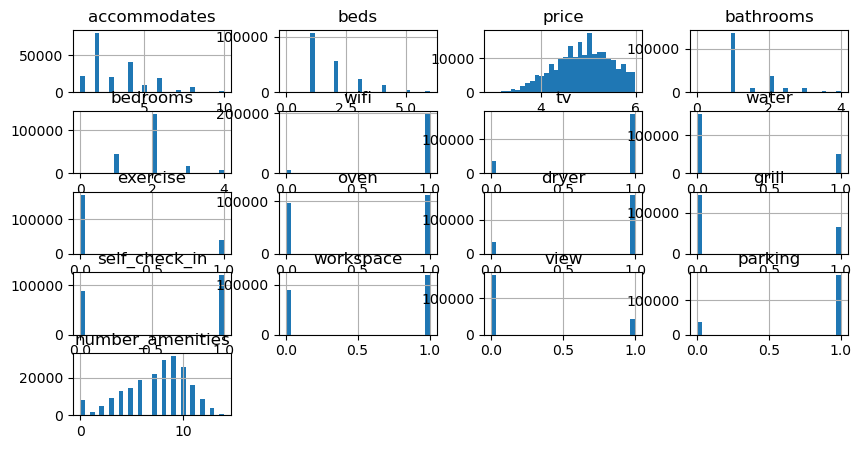

In [53]:
df.hist(bins=30, figsize=(10,5))

In [54]:
# UNIVARIATE AND BIVARIATE ANALYSIS

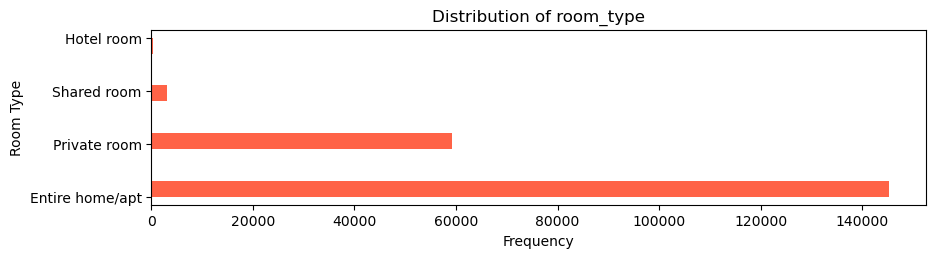

In [55]:
# room_type
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title("Distribution of room_type")
plt.hist(data=df, x="room_type", orientation="horizontal", color="tomato")
plt.xlabel("Frequency")
plt.ylabel("Room Type")
plt.show()

Text(0, 0.5, 'Frequency')

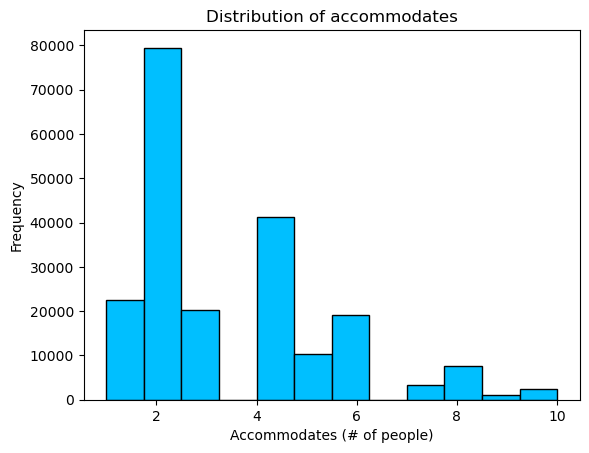

In [56]:
# accomodates
plt.title("Distribution of accommodates")
plt.hist(data=df, x="accommodates", bins=12, color="deepskyblue", edgecolor='black')
plt.xlabel("Accommodates (# of people)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

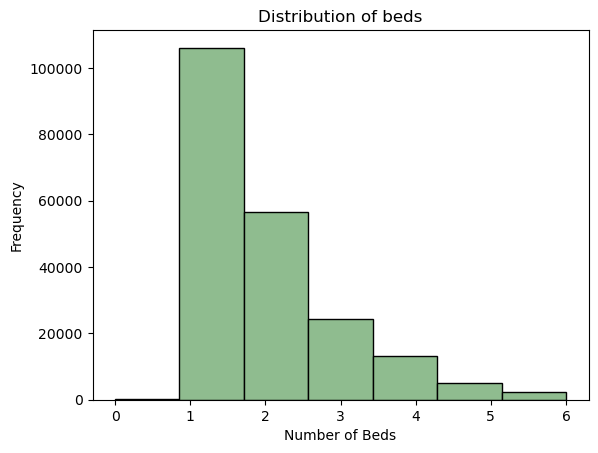

In [57]:
# beds
plt.title("Distribution of beds")
plt.hist(data=df, x="beds", color="darkseagreen", bins=7, edgecolor='black')
plt.xlabel("Number of Beds")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

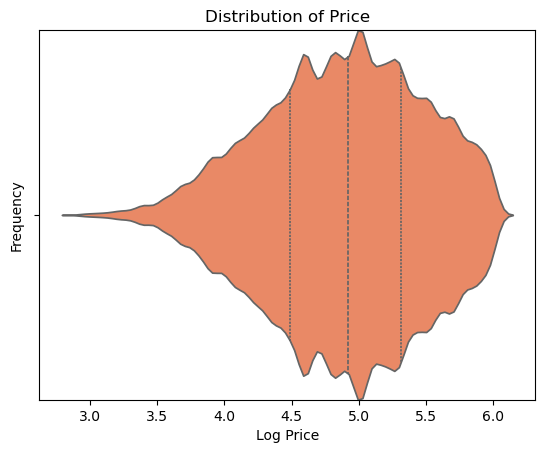

In [58]:
# price (dependent variable)
plt.title("Distribution of Price")
seaborn.violinplot(data=df, x="price", cut=3, density_norm="count", width=1, color="coral", inner="quartile")
plt.xlabel("Log Price")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

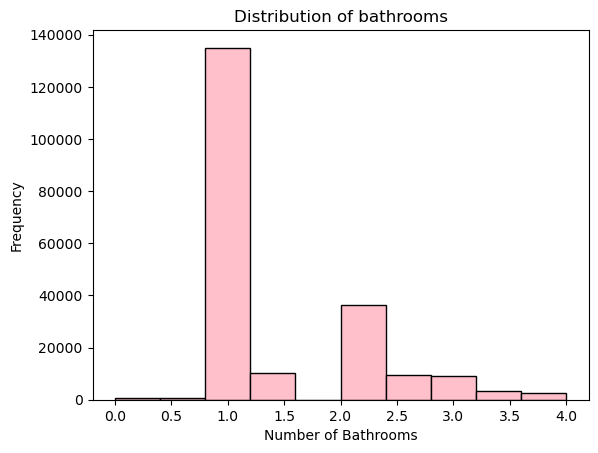

In [59]:
# bathrooms
plt.title("Distribution of bathrooms")
plt.hist(data=df, x="bathrooms", color="pink", edgecolor='black')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")

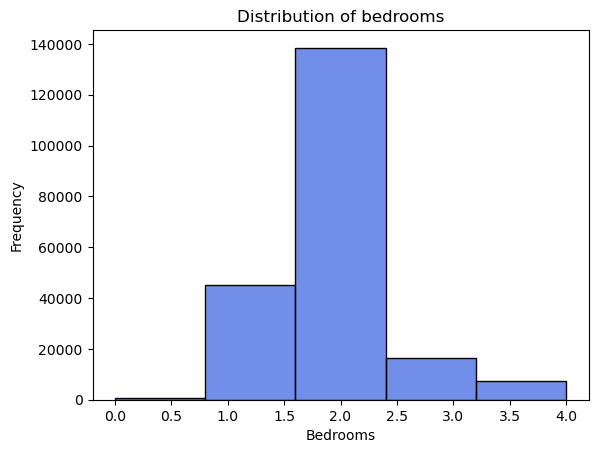

In [60]:
# bedrooms
plt.title("Distribution of bedrooms")
plt.ylabel("Frequency")
plt.xlabel("Bedrooms")
seaborn.histplot(df['bedrooms'], color="royalblue", bins=5, edgecolor="black")
plt.show()

([<matplotlib.patches.Wedge at 0x21f1846b7d0>,
 [Text(-0.16263026872249067, -1.0980215825270698, 'los-angeles '),
  Text(-0.8078837112446562, 0.7611989944196991, 'san-diego'),
  Text(0.030446359184548643, 1.1095823625186216, 'san-francisco'),
  Text(0.7037096911175607, 0.8584245282068935, 'santa-clara-county'),
  Text(0.9902110546646464, 0.5015795721716834, 'oakland'),
  Text(1.0832484028801643, 0.24222489066479824, 'san-mateo-county'),
  Text(1.1977058750387022, 0.07416627871059256, 'santa-cruz-county'),
  Text(1.1099664087120176, 0.008635480933114318, 'pacific-grove')],
 [Text(-0.08937339091956692, -0.6034172660734347, '54.7%'),
  Text(-0.4439721296029192, 0.41831656450091564, '14.7%'),
  Text(0.016731782975292493, 0.6097704875102333, '12.1%'),
  Text(0.3867233437673081, 0.4717468127983828, '8.9%'),
  Text(0.5441700390499408, 0.2756428279502043, '4.4%'),
  Text(0.5952986718530632, 0.13311457955452874, '3.6%'),
  Text(0.6986617604392428, 0.043263662581178995, '1.5%'),
  Text(0.6099815

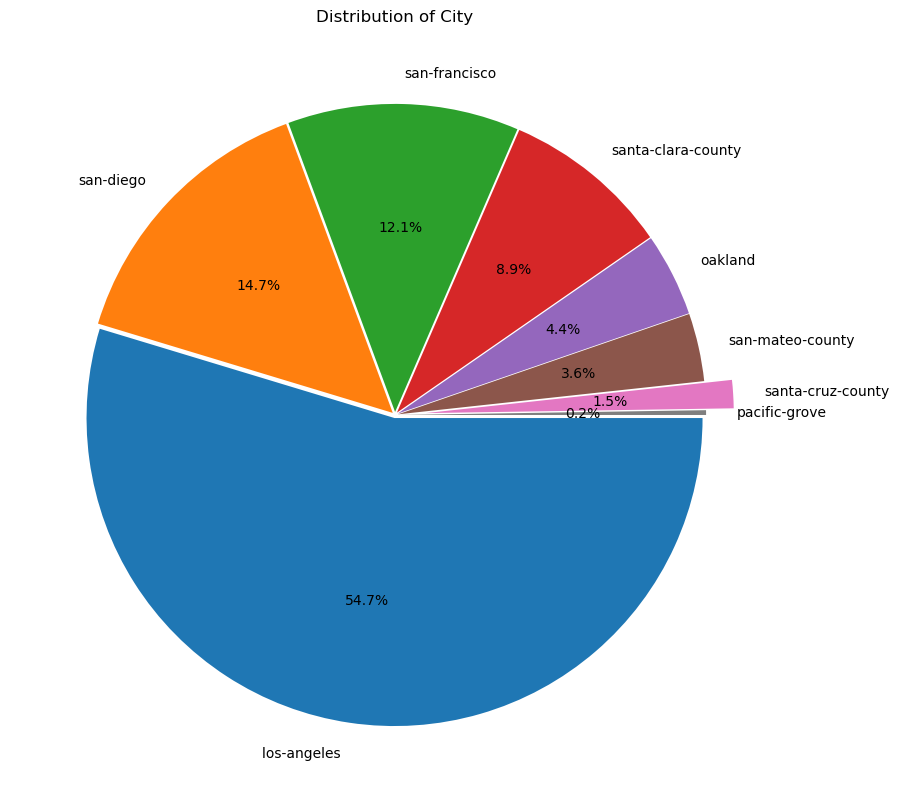

In [61]:
# City
city_counts = df["City"].value_counts()
city_labels = ["los-angeles ", "san-diego", "san-francisco", 'santa-clara-county', 'oakland', 'san-mateo-county', 'santa-cruz-county', 'pacific-grove']
explode = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.01]

plt.figure(figsize=(10,10))
plt.title("Distribution of City")
plt.pie(city_counts, labels=city_labels, explode=explode, autopct='%.01f%%', counterclock=False)

([<matplotlib.patches.Wedge at 0x21f183f2f10>,
 [Text(-1.0847218235323304, 0.18269801737483699, 'Yes'),
  Text(1.084721825670508, -0.1826980046799639, 'No')],
 [Text(-0.5916664491994529, 0.09965346402263835, '94.7%'),
  Text(0.5916664503657316, -0.0996534570981621, '5.3%')])

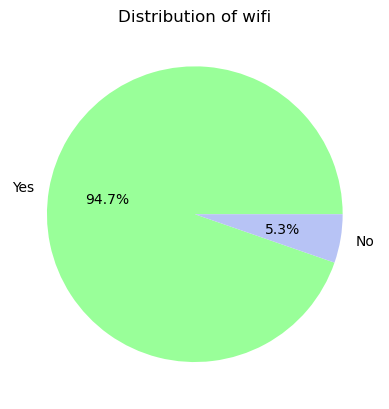

In [62]:
# wifi
wifi_counts = df["wifi"].value_counts()
wifi_labels = ["Yes", "No"]
colors = ['#99FF99', '#B7C3F5'] 

plt.title("Distribution of wifi")
plt.pie(wifi_counts, labels=wifi_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f17f0b7d0>,
 [Text(-0.9565525511963358, 0.5431456681220809, 'Yes'),
  Text(0.9565525003433638, -0.5431457576809923, 'No')],
 [Text(-0.5217559370161831, 0.29626127352113496, '83.6%'),
  Text(0.5217559092781984, -0.2962613223714503, '16.4%')])

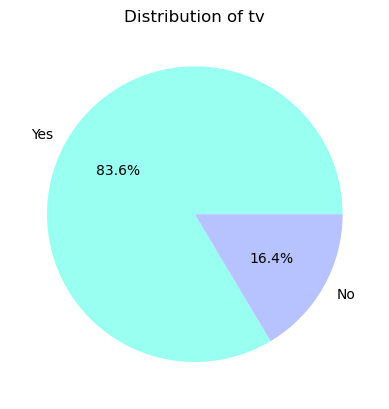

In [63]:
# tv
tv_counts = df["tv"].value_counts()
tv_labels = ["Yes", "No"]
colors = ['#99FFF1', '#B7C3FF'] 

plt.title("Distribution of tv")
plt.pie(tv_counts, labels=tv_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f17f3d410>,
 [Text(-0.7809366544006018, 0.7746857051821694, 'Yes'),
  Text(0.780936690666256, -0.7746856686238854, 'No')],
 [Text(-0.42596544785487367, 0.4225558391902742, '75.1%'),
  Text(0.4259654676361396, -0.42255581924939206, '24.9%')])

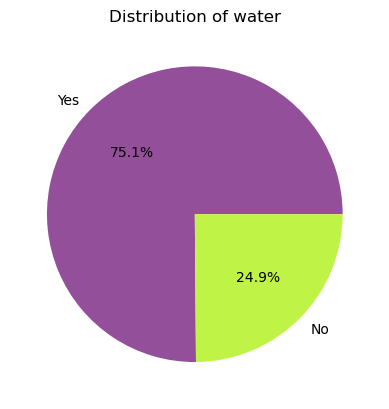

In [64]:
# water
water_counts = df["water"].value_counts()
water_labels = ["Yes", "No"]
colors = ['#934F99', '#BFF345'] 

plt.title("Distribution of water")
plt.pie(water_counts, labels=water_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f17f737d0>,
 [Text(-0.9205912052820625, 0.6020895554295222, 'Yes'),
  Text(0.9205911770962152, -0.6020895985255063, 'No')],
 [Text(-0.5021406574265794, 0.32841248477973933, '81.6%'),
  Text(0.502140642052481, -0.3284125082866397, '18.4%')])

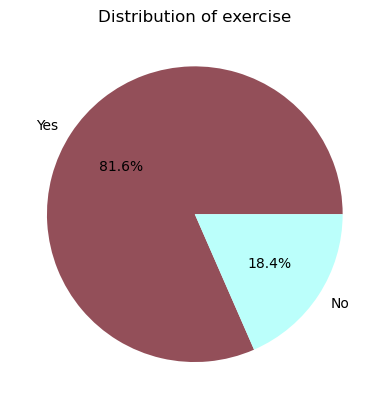

In [65]:
# exercise
exercise_counts = df["exercise"].value_counts()
exercise_labels = ["Yes", "No"]
colors = ['#934F59', '#BBFFFB'] 

plt.title("Distribution of exercise")
plt.pie(exercise_counts, labels=exercise_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f17fd1e10>,
 [Text(-0.13691489854178474, 1.0914459723492012, 'Yes'),
  Text(0.13691489854178482, -1.0914459723492012, 'No')],
 [Text(-0.07468085375006439, 0.5953341667359278, '54.0%'),
  Text(0.07468085375006445, -0.5953341667359278, '46.0%')])

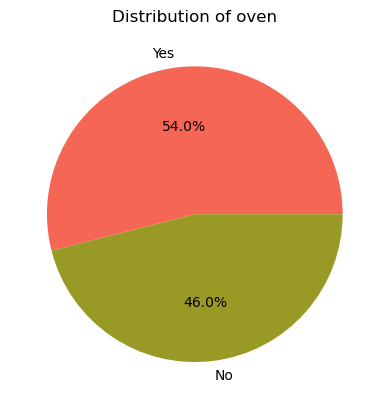

In [66]:
# oven
oven_counts = df["oven"].value_counts()
oven_labels = ["Yes", "No"]
colors = ['#F56654', '#999925'] 

plt.title("Distribution of oven")
plt.pie(oven_counts, labels=oven_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f1803c110>,
 [Text(-0.9619040636206362, 0.5336108810641959, 'Yes'),
  Text(0.9619040886007632, -0.5336108360342164, 'No')],
 [Text(-0.5246749437930742, 0.29106048058047046, '83.9%'),
  Text(0.524674957418598, -0.2910604560186635, '16.1%')])

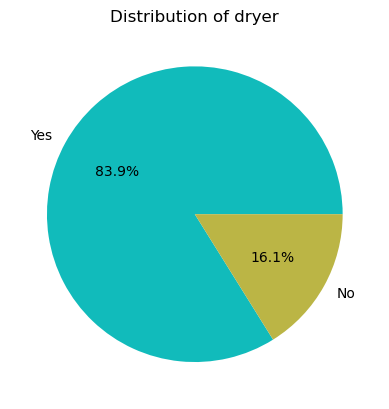

In [67]:
# dryer
dryer_counts = df["dryer"].value_counts()
dryer_labels = ["Yes", "No"]
colors = ['#11BBBB', '#BBB545'] 

plt.title("Distribution of dryer")
plt.pie(dryer_counts, labels=dryer_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f17ff4090>,
 [Text(-0.6219435059875721, 0.9072961343243379, 'Yes'),
  Text(0.6219434210403741, -0.9072961925548878, 'No')],
 [Text(-0.33924191235685747, 0.49488880054054785, '69.1%'),
  Text(0.3392418660220222, -0.494888832302666, '30.9%')])

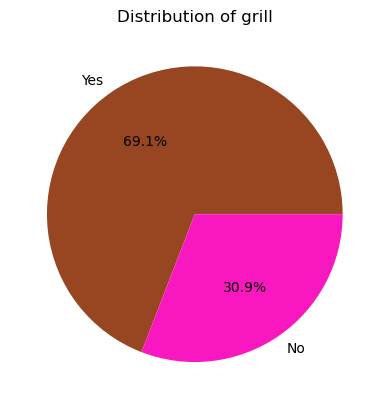

In [68]:
# grill
grill_counts = df["grill"].value_counts()
grill_labels = ["Yes", "No"]
colors = ['#974621', '#F917BF'] 

plt.title("Distribution of grill")
plt.pie(grill_counts, labels=grill_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f180a7890>,
 [Text(-0.26257698534974916, 1.0682009767663752, 'Yes'),
  Text(0.2625769853497493, -1.0682009767663752, 'No')],
 [Text(-0.14322381019077227, 0.5826550782362045, '57.7%'),
  Text(0.14322381019077232, -0.5826550782362045, '42.3%')])

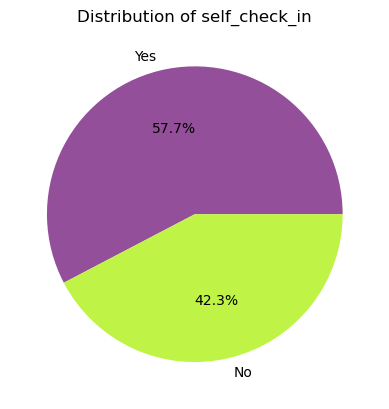

In [69]:
# self_check_in
self_counts = df["self_check_in"].value_counts()
self_labels = ["Yes", "No"]
colors = ['#934F99', '#BFF345'] 

plt.title("Distribution of self_check_in")
plt.pie(self_counts, labels=self_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f180a7290>,
 [Text(-0.23890730754811368, 1.0737426592997557, 'Yes'),
  Text(0.2389073075481135, -1.0737426592997557, 'No')],
 [Text(-0.1303130768444256, 0.5856778141635031, '57.0%'),
  Text(0.13031307684442553, -0.5856778141635031, '43.0%')])

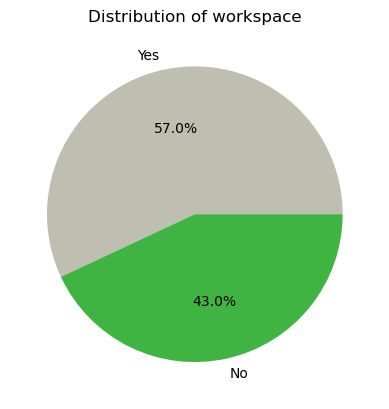

In [70]:
# workspace
workspace_counts = df["workspace"].value_counts()
workspace_labels = ["Yes", "No"]
colors = ['#BFBFB1', '#3FB443'] 

plt.title("Distribution of workspace")
plt.pie(workspace_counts, labels=workspace_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f18163610>,
 [Text(-0.8664470786127768, 0.6776942230559331, 'Yes'),
  Text(0.8664471103379315, -0.6776941824946179, 'No')],
 [Text(-0.47260749742515096, 0.36965139439414524, '78.9%'),
  Text(0.4726075147297808, -0.3696513722697915, '21.1%')])

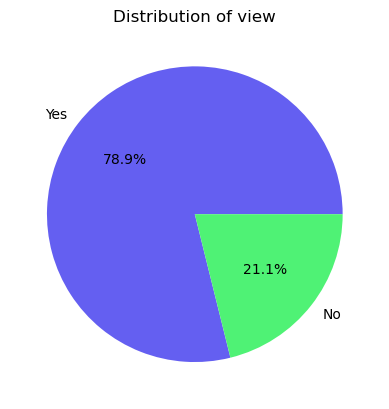

In [71]:
# view
view_counts = df["view"].value_counts()
view_labels = ["Yes", "No"]
colors = ['#645FF1', '#4FF275'] 

plt.title("Distribution of view")
plt.pie(view_counts, labels=view_labels, colors=colors, autopct='%.01f%%')

([<matplotlib.patches.Wedge at 0x21f181ab310>,
 [Text(-0.9425133122036279, 0.5671584049619179, 'Yes'),
  Text(0.942513285653026, -0.5671584490841495, 'No')],
 [Text(-0.5140981702928878, 0.30935912997922793, '82.8%'),
  Text(0.5140981558107414, -0.30935915404589964, '17.2%')])

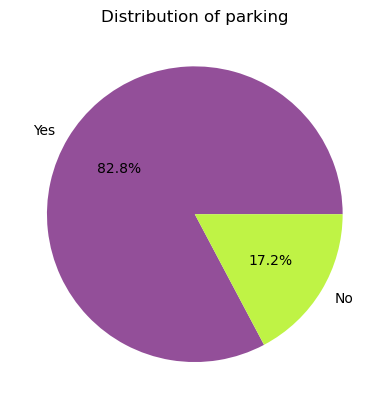

In [72]:
# parking
parking_counts = df["parking"].value_counts()
parking_labels = ["Yes", "No"]
colors = ['#934F99', '#BFF345'] 

plt.title("Distribution of parking")
plt.pie(parking_counts, labels=parking_labels, colors=colors, autopct='%.01f%%')

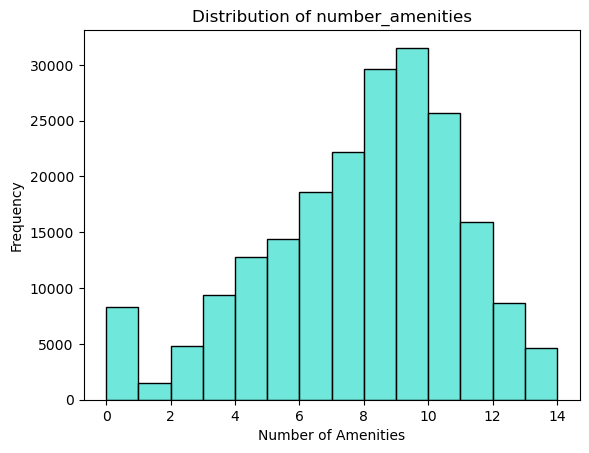

In [73]:
# number_amenities
plt.title("Distribution of number_amenities")
plt.ylabel("Frequency")
plt.xlabel("Number of Amenities")
seaborn.histplot(df['number_amenities'], bins=14, color="turquoise", edgecolor="black")
plt.show()

In [74]:
# BIVARIATE ANALYSES

Text(0, 0.5, 'Price')

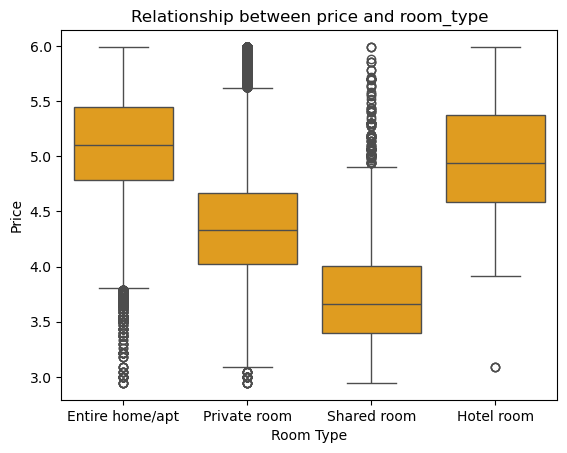

In [75]:
# price and room_type
plt.title("Relationship between price and room_type")
seaborn.boxplot(data=df, x="room_type", y="price", color="orange")
plt.xlabel("Room Type")
plt.ylabel("Price")

Text(0.5, 0, 'Accomodates')

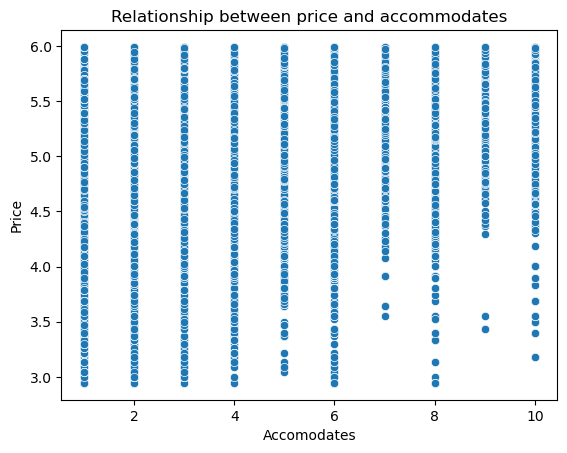

In [76]:
# price and accommodates
plt.title("Relationship between price and accommodates")
seaborn.scatterplot(data=df, x="accommodates", y="price")
plt.ylabel("Price")
plt.xlabel("Accomodates")

Text(0.5, 0, 'Beds')

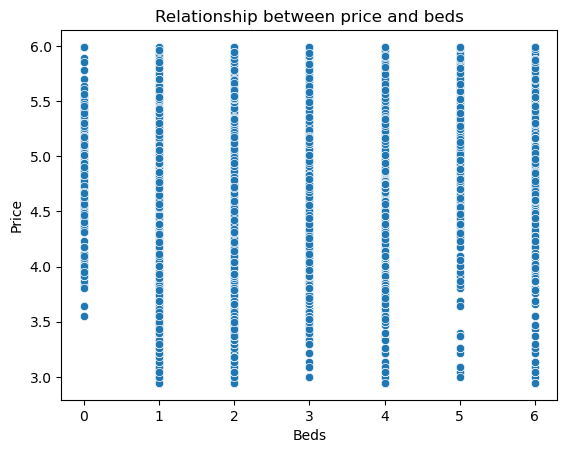

In [77]:
# price and beds
plt.title("Relationship between price and beds")
seaborn.scatterplot(data=df, x="beds", y="price")
plt.ylabel("Price")
plt.xlabel("Beds")

Text(0.5, 0, 'Bathrooms')

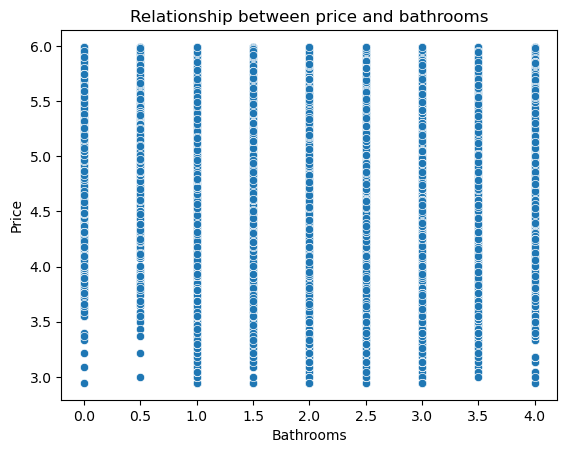

In [78]:
# price and bathrooms
plt.title("Relationship between price and bathrooms")
seaborn.scatterplot(data=df, x="bathrooms", y="price")
plt.ylabel("Price")
plt.xlabel("Bathrooms")

Text(0.5, 0, 'Bedrooms')

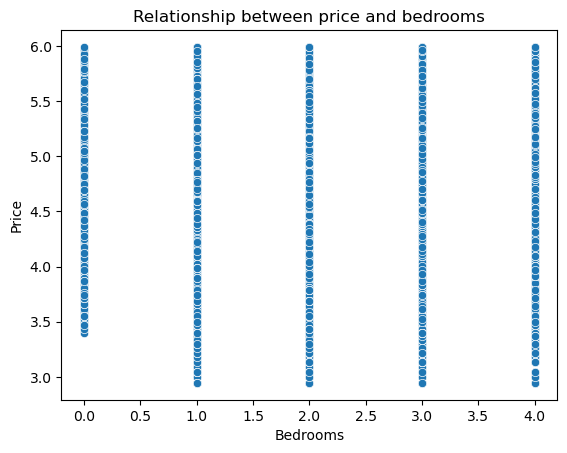

In [79]:
# price and bedrooms
plt.title("Relationship between price and bedrooms")
seaborn.scatterplot(data=df, x="bedrooms", y="price")
plt.ylabel("Price")
plt.xlabel("Bedrooms")

Text(0, 0.5, 'City')

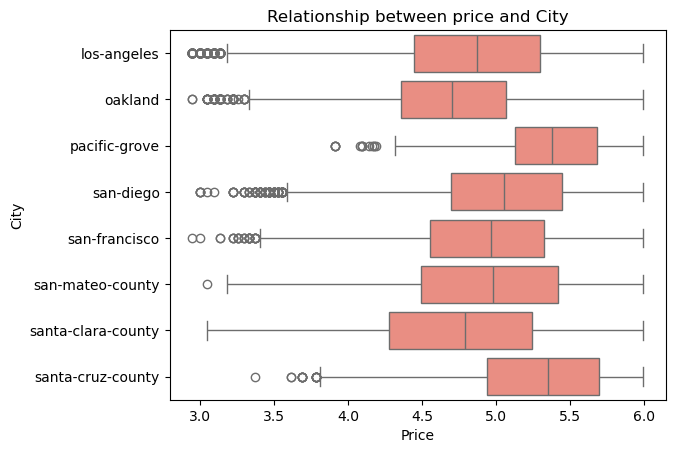

In [80]:
# price and City
plt.title("Relationship between price and City")
seaborn.boxplot(data=df, x="price", y="City", color="salmon")
plt.xlabel("Price")
plt.ylabel("City")

([<matplotlib.axis.XTick at 0x21f2cdb0e10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

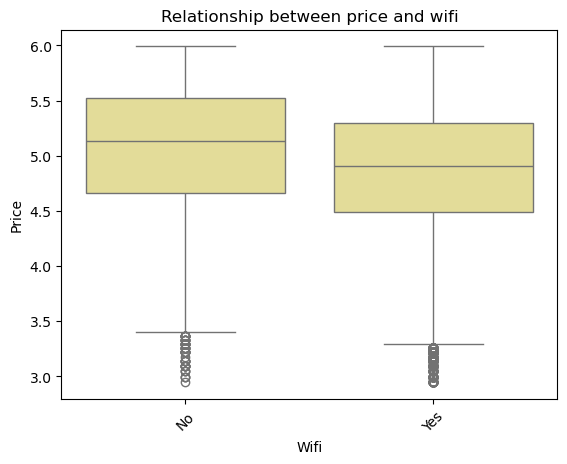

In [81]:
# price and wifi
plt.title("Relationship between price and wifi")
seaborn.boxplot(data=df, x="wifi", y="price", color="khaki")
plt.xlabel("Wifi")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2a9f1510>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

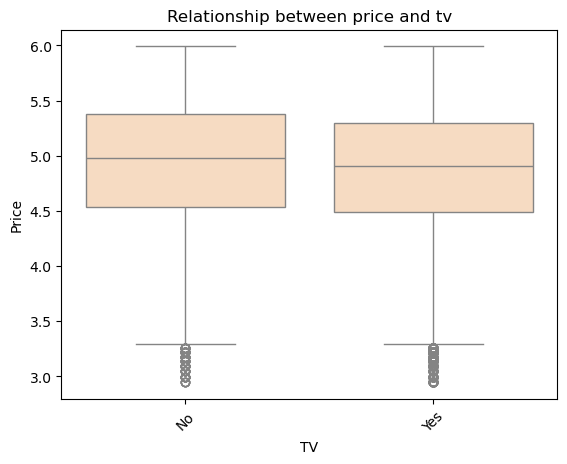

In [82]:
# price and tv
plt.title("Relationship between price and tv")
seaborn.boxplot(data=df, x="tv", y="price", color="peachpuff")
plt.xlabel("TV")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2c949110>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

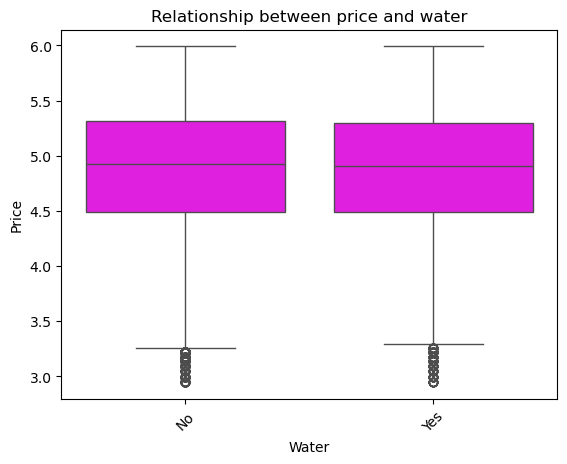

In [83]:
# price and water
plt.title("Relationship between price and water")
seaborn.boxplot(data=df, x="water", y="price", color="magenta")
plt.xlabel("Water")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2e7fd8d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

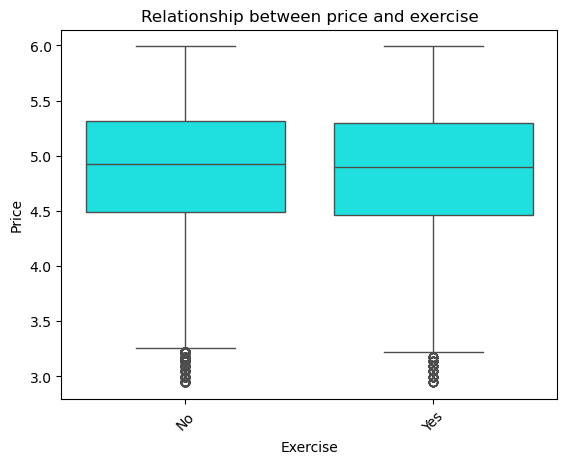

In [84]:
# price and exercise
plt.title("Relationship between price and exercise")
seaborn.boxplot(data=df, x="exercise", y="price", color="cyan")
plt.xlabel("Exercise")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2889e410>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

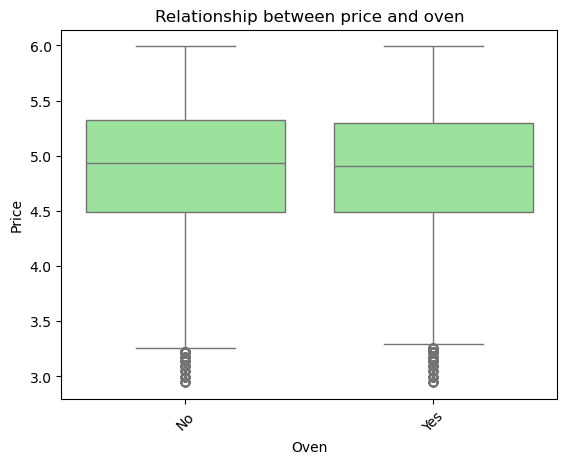

In [85]:
# price and oven
plt.title("Relationship between price and oven")
seaborn.boxplot(data=df, x="oven", y="price", color="lightgreen")
plt.xlabel("Oven")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2a9d9c50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

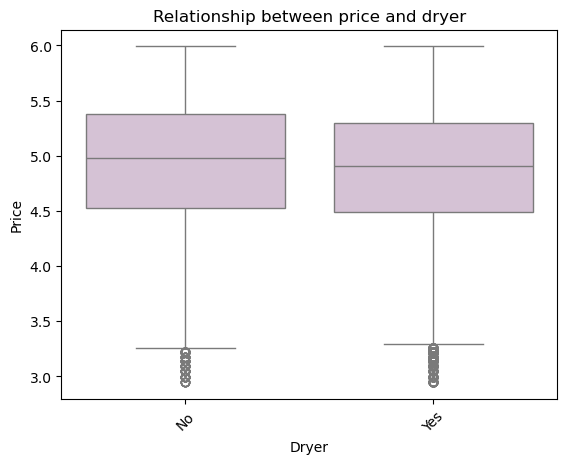

In [86]:
# price and dryer
plt.title("Relationship between price and dryer")
seaborn.boxplot(data=df, x="dryer", y="price", color="thistle")
plt.xlabel("Dryer")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f18d69dd0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

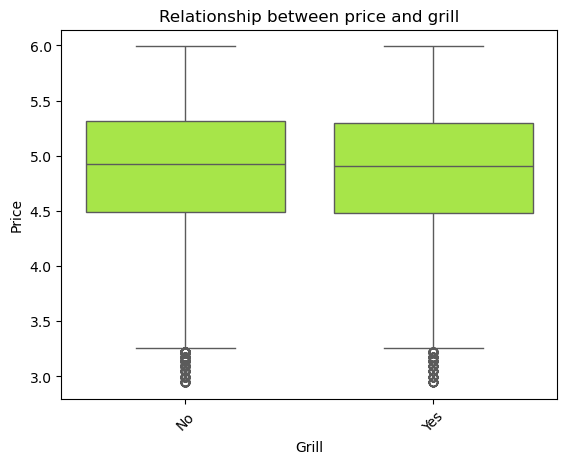

In [87]:
# price and grill
plt.title("Relationship between price and grill")
seaborn.boxplot(data=df, x="grill", y="price", color="greenyellow")
plt.xlabel("Grill")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2c15f810>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

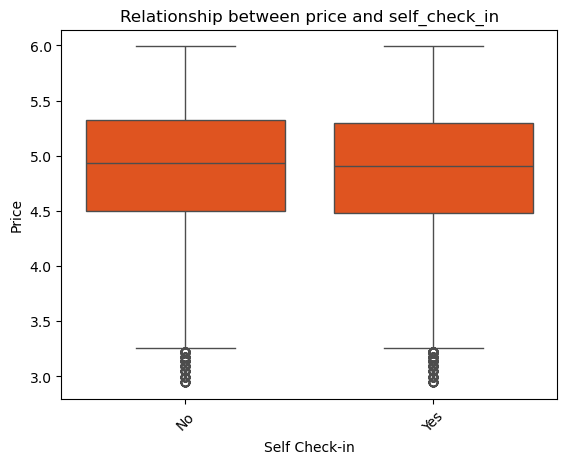

In [88]:
# price and self_check_in
plt.title("Relationship between price and self_check_in")
seaborn.boxplot(data=df, x="self_check_in", y="price", color="orangered")
plt.xlabel("Self Check-in")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2bc3e610>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

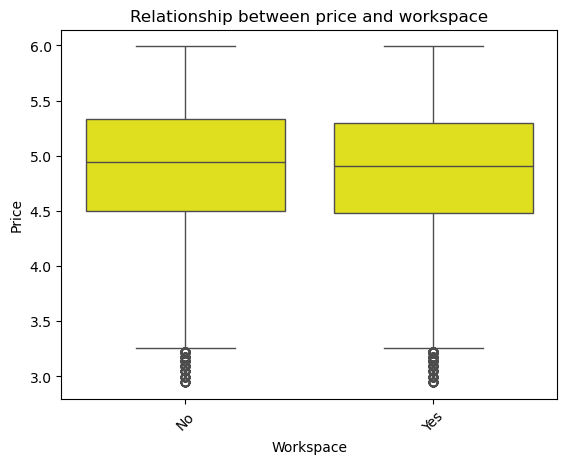

In [89]:
# price and workspace
plt.title("Relationship between price and workspace")
seaborn.boxplot(data=df, x="workspace", y="price", color="yellow")
plt.xlabel("Workspace")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2ca78e50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

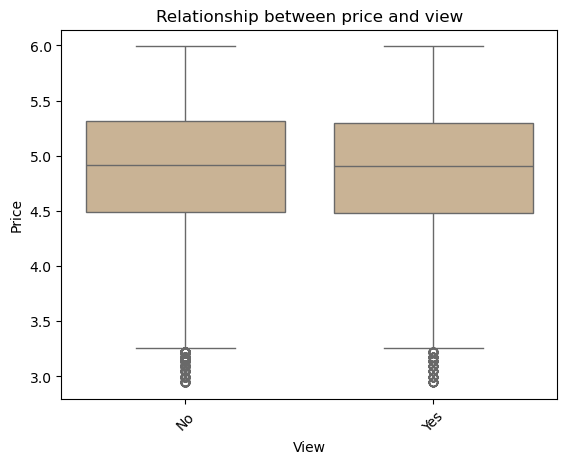

In [90]:
# price and view
plt.title("Relationship between price and view")
seaborn.boxplot(data=df, x="view", y="price", color="tan")
plt.xlabel("View")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

([<matplotlib.axis.XTick at 0x21f2c7c3590>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

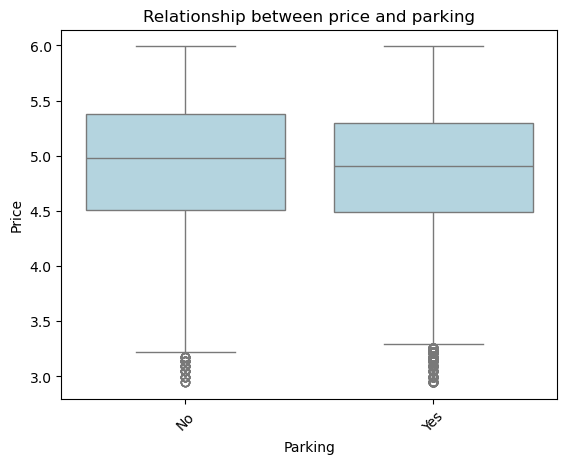

In [91]:
# price and parking
plt.title("Relationship between price and parking")
seaborn.boxplot(data=df, x="parking", y="price", color="lightblue")
plt.xlabel("Parking")
plt.ylabel("Price")
plt.xticks([0,1], ['No', 'Yes'], rotation=45)

Text(0.5, 0, 'Number of Amenities')

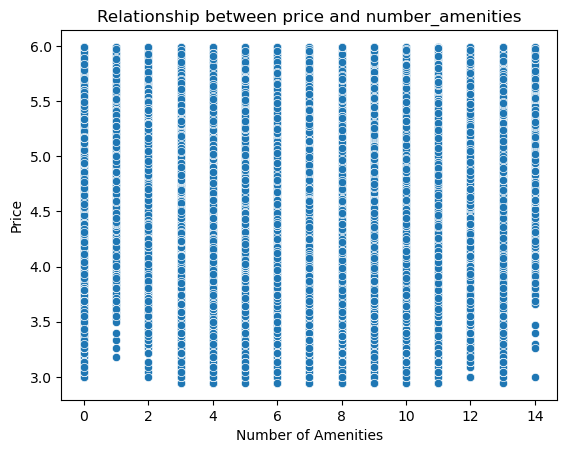

In [92]:
# price and number_amenities
plt.title("Relationship between price and number_amenities")
seaborn.scatterplot(data=df, x="number_amenities", y="price")
plt.ylabel("Price")
plt.xlabel("Number of Amenities")

In [93]:
# Create dummy variables

In [94]:
df = pd.get_dummies(df, drop_first = True, dtype=int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207968 entries, 0 to 247855
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   accommodates             207968 non-null  float64
 1   beds                     207968 non-null  float64
 2   price                    207968 non-null  float64
 3   bathrooms                207968 non-null  float64
 4   bedrooms                 207968 non-null  float64
 5   wifi                     207968 non-null  int32  
 6   tv                       207968 non-null  int32  
 7   water                    207968 non-null  int32  
 8   exercise                 207968 non-null  int32  
 9   oven                     207968 non-null  int32  
 10  dryer                    207968 non-null  int32  
 11  grill                    207968 non-null  int32  
 12  self_check_in            207968 non-null  int32  
 13  workspace                207968 non-null  int32  
 14  view     

In [96]:
# Save dataset

In [97]:
df.to_csv('DFNTest.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207968 entries, 0 to 247855
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   accommodates             207968 non-null  float64
 1   beds                     207968 non-null  float64
 2   price                    207968 non-null  float64
 3   bathrooms                207968 non-null  float64
 4   bedrooms                 207968 non-null  float64
 5   wifi                     207968 non-null  int32  
 6   tv                       207968 non-null  int32  
 7   water                    207968 non-null  int32  
 8   exercise                 207968 non-null  int32  
 9   oven                     207968 non-null  int32  
 10  dryer                    207968 non-null  int32  
 11  grill                    207968 non-null  int32  
 12  self_check_in            207968 non-null  int32  
 13  workspace                207968 non-null  int32  
 14  view     

In [99]:
# DATA PREPARED but not scaled or split

In [100]:
# Setting X and y for analysis, scaling, and splitting
X = df.loc[:, df.columns != 'price']
y = df.price

In [101]:
# Scale data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [102]:
# examine
X

,accommodates,beds,bathrooms,bedrooms,wifi,tv,water,exercise,oven,dryer,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,City_oakland,City_pacific-grove,City_san-diego,City_san-francisco,City_san-mateo-county,City_santa-clara-county,City_santa-cruz-county
0,1.345010,0.131027,-0.606636,0.106723,0.236840,0.443529,-0.575381,-0.475435,0.923474,0.438410,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,-0.122284
1,-1.187452,-0.756143,-0.606636,-1.389703,0.236840,0.443529,1.737979,2.103337,0.923474,0.438410,...,-0.042728,1.586828,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,-0.122284
2,-1.187452,-0.756143,0.807272,0.106723,0.236840,0.443529,-0.575381,-0.475435,0.923474,0.438410,...,-0.042728,1.586828,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,-0.122284
3,-0.680959,-0.756143,-0.606636,0.106723,0.236840,0.443529,-0.575381,-0.475435,0.923474,0.438410,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,-0.122284
4,-0.174467,0.131027,0.100318,0.106723,0.236840,0.443529,-0.575381,-0.475435,0.923474,0.438410,...,-0.042728,1.586828,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,-0.122284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207963,1.345010,1.018197,-0.606636,0.106723,-4.222256,-2.254645,-0.575381,-0.475435,-1.082868,-2.280968,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,8.177694
207964,0.838517,-0.756143,-0.606636,0.106723,-4.222256,-2.254645,-0.575381,-0.475435,-1.082868,-2.280968,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,8.177694
207965,0.332025,1.018197,-0.606636,0.106723,-4.222256,-2.254645,-0.575381,-0.475435,-1.082868,-2.280968,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,8.177694
207966,1.345010,1.905366,1.514227,0.106723,-4.222256,-2.254645,-0.575381,-0.475435,-1.082868,-2.280968,...,-0.042728,-0.630188,-0.12293,-0.192149,-0.049825,-0.415,-0.371506,-0.213545,-0.311725,8.177694


In [103]:
y

0         4.859812
1         4.543295
2         5.187386
3         3.912023
4         5.393628
            ...   
247847    5.488938
247849    4.564348
247852    5.164786
247854    5.164786
247855    4.762174
Name: price, Length: 207968, dtype: float64

In [104]:
# Sparsity test
sparsity = df.astype(pd.SparseDtype('int', 0))
sparsity = sparsity.sparse.density
print(round(sparsity*100), 2)

47 2


In [105]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=452)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166374, 26)
(41594, 26)
(166374,)
(41594,)


In [106]:
# To .csvs
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

<Axes: >

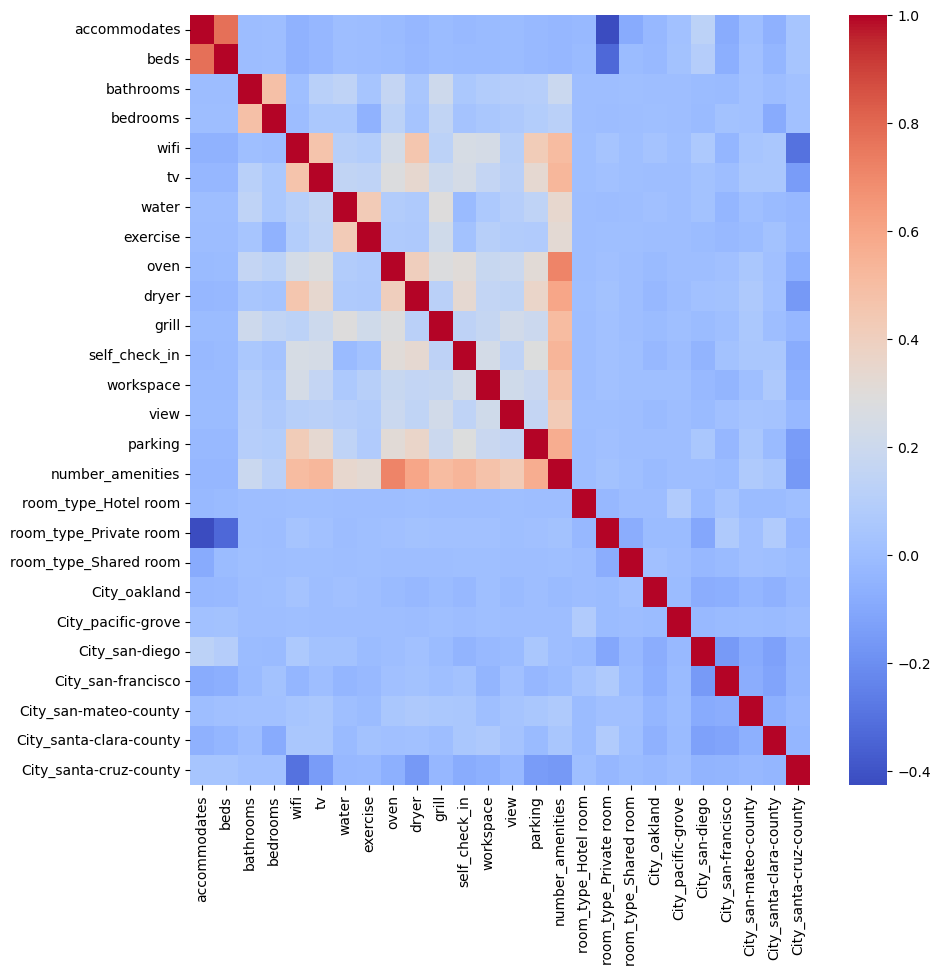

In [107]:
# Heatmap (correlation)
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(data=X.corr(), annot=False, cmap='coolwarm', ax=ax)

In [108]:
# Check VIFs

In [109]:
X = df.loc[:, df.columns != 'price'].assign(const=1)


In [110]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2.825262,accommodates
1,2.543269,beds
2,1.373751,bathrooms
3,1.344890,bedrooms
4,1.893167,wifi
5,1.947553,tv
6,1.897295,water
7,1.778450,exercise
8,5.791325,oven
9,2.442454,dryer


In [111]:
# Narrow down variables
X = X.loc[:, X.columns != 'oven'].assign(const=1)
X = X.loc[:, X.columns != 'self_check_in'].assign(const=1)
X = X.loc[:, X.columns != 'dryer'].assign(const=1)


In [112]:
# VIF <5
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2.825195,accommodates
1,2.543243,beds
2,1.369616,bathrooms
3,1.342899,bedrooms
4,1.679515,wifi
5,1.561132,tv
6,1.355374,water
7,1.332175,exercise
8,1.467472,grill
9,1.373074,workspace


In [113]:
# Shapiro Wilk

In [114]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['price'])

print('Shapiro-Wilk value: ', statistic)
print('p_value: ', p_value)

Shapiro-Wilk value:  0.9872097969055176
p_value:  0.0


In [115]:
# Stepwise Model

In [116]:
# Initital Model
mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     8782.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:14   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207944   BIC:                         2.304e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [117]:
# RSE
rse = np.sqrt(res.mse_resid)
print('RSE(initial model): ', rse.round(4))

RSE(initial model):  0.4208


In [118]:
# 2nd step - remove view
X = X.loc[:, X.columns != 'view'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9181.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:14   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207945   BIC:                         2.304e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [119]:
# 3rd step - remove bedrooms
X = X.loc[:, X.columns != 'bedrooms'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9618.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:14   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207946   BIC:                         2.304e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [120]:
# 4th step - remove bathrooms
X = X.loc[:, X.columns != 'bathrooms'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.010e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:15   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207947   BIC:                         2.304e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [121]:
# 5th step - remove tv
X = X.loc[:, X.columns != 'tv'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:15   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207948   BIC:                         2.304e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [122]:
# 6th step - remove room_type_Hotel room
X = X.loc[:, X.columns != 'room_type_Hotel room'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:15   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207949   BIC:                         2.304e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [123]:
# 7th step - remove exercise
X = X.loc[:, X.columns != 'exercise'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:15   Log-Likelihood:            -1.1507e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207950   BIC:                         2.304e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [124]:
# 8th step - remove grill
X = X.loc[:, X.columns != 'grill'].assign(const=1)

mod = smf.ols((y,X), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.262e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:57:16   Log-Likelihood:            -1.1508e+05
No. Observations:              207968   AIC:                         2.302e+05
Df Residuals:                  207951   BIC:                         2.304e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
accommodates              

In [125]:
# RSE of final model
rse = np.sqrt(res.mse_resid)
print('RSE(final model): ', rse.round(4))

RSE(final model):  0.4208


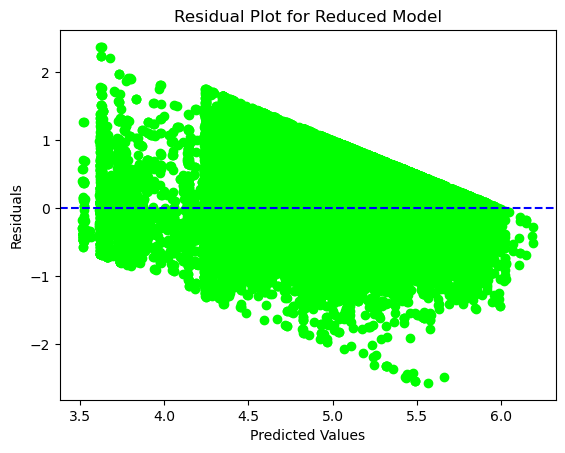

In [126]:
# Fit model
mod = sm.OLS(y, sm.add_constant(X)).fit()
               
# Create theoretical values
y_theor = mod.predict(sm.add_constant(X))
               
# Subtract theoretical values from actual values
residuals = y - y_theor

# Create the residual plot

plt.scatter(y_theor, residuals, c="lime")
plt.title("Residual Plot for Reduced Model")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

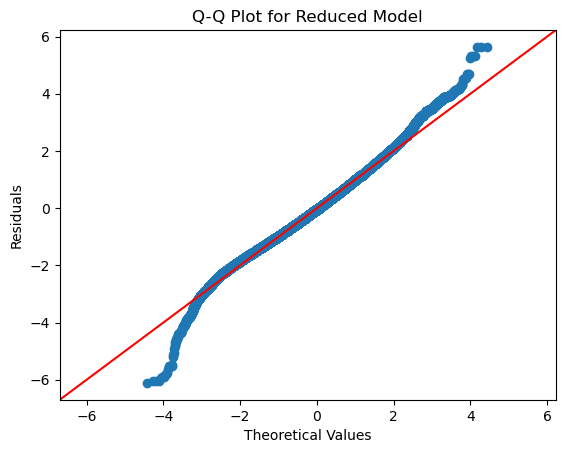

In [127]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.xlabel("Theoretical Values")
plt.ylabel("Residuals")
plt.title("Q-Q Plot for Reduced Model")
plt.show()

In [128]:
# Mean score
print('Mean Score: ', residuals.mean().round(6))
print(residuals.mean())

Mean Score:  -0.0
-8.930556111685124e-16


In [129]:
# print evaluation metrics
rmse = rmse(y, y_theor)
print('RMSE: ', rmse.round(2))
mse = rmse**2
print('MSE: ', mse.round(2))
r2 = r2_score(y, y_theor)
print('R-squared: ', r2.round(2))

RMSE:  0.42
MSE:  0.18
R-squared:  0.49


In [130]:
# examine
print(y_theor.head(20).round(2), y.head(20).round(2))

0     5.28
1     4.25
2     4.25
3     4.83
4     4.49
5     4.25
6     4.36
7     4.93
8     5.32
9     4.93
10    4.61
11    4.35
12    4.90
13    4.25
14    4.35
15    4.97
16    5.12
17    4.36
18    4.25
19    4.83
dtype: float64 0     4.86
1     4.54
2     5.19
3     3.91
4     5.39
5     4.01
6     4.09
7     4.92
8     5.74
9     4.49
10    4.56
11    3.85
12    4.78
13    4.69
14    4.17
15    5.01
16    4.82
17    4.38
18    4.50
19    4.73
Name: price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

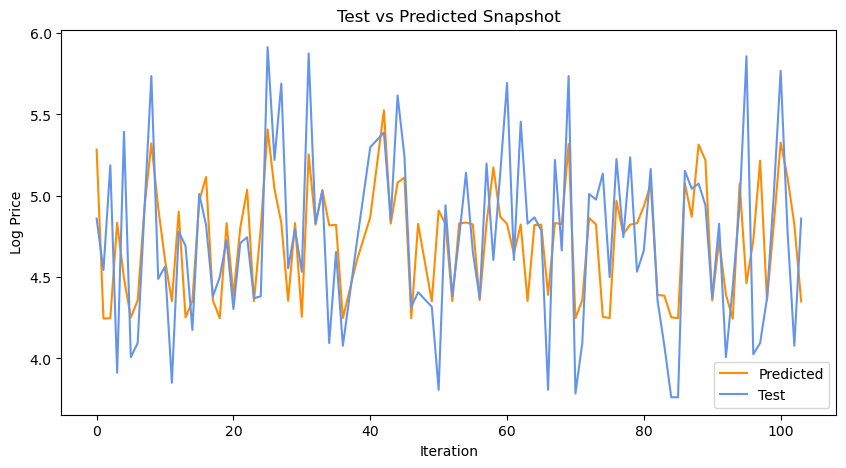

In [131]:
# Test v predicted graph
plt.figure(figsize=(10,5))
plt.plot(y_theor.head(100), color='darkorange', label='Predicted')
plt.plot(y.head(100), color='cornflowerblue', label='Test')
plt.title('Test vs Predicted Snapshot')
plt.xlabel('Iteration')
plt.ylabel('Log Price')
plt.legend()
plt.show

In [132]:
# Linear regression model

In [133]:
# Create and fit model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [134]:
# Create and print evaluation metrics
y_train_preds = linear_reg.predict(X_train)
print("Training data: \nR-squared: ", r2_score(y_train, y_train_preds).round(2))
print('RMSE: ', mean_squared_error(y_train, y_train_preds).round(2))
print('MSE: ', (mean_squared_error(y_train, y_train_preds) ** 0.5).round(2))
y_test_preds = linear_reg.predict(X_test)
print("Testing data:\nR-squared: ", r2_score(y_test, y_test_preds).round(2))
print('RMSE: ', mean_squared_error(y_test, y_test_preds).round(2))
print('MSE: ', (mean_squared_error(y_test, y_test_preds) ** 0.5).round(2))


Training data: 
R-squared:  0.49
RMSE:  0.18
MSE:  0.42
Testing data:
R-squared:  0.49
RMSE:  0.18
MSE:  0.42


In [135]:
# Intercept
print('Intercept: ', linear_reg.intercept_)

Intercept:  4.885245541537122


In [136]:
# List of features and their coefficients
coefficients = pd.DataFrame(list(zip((linear_reg.coef_),X_train)), columns = ['Coefficient', 'Feature'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient,Feature
0,0.206117,accommodates
22,0.056420,City_san-francisco
1,0.043911,beds
25,0.031692,City_santa-cruz-county
21,0.021297,City_san-diego
23,0.020627,City_san-mateo-county
20,0.017257,City_pacific-grove
24,0.004171,City_santa-clara-county
10,0.002313,grill
11,0.001738,self_check_in


In [137]:
# Residuals
residuals = y_test - y_test_preds

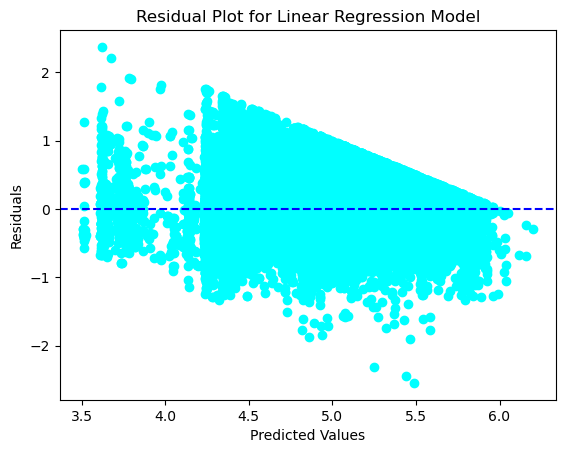

In [138]:
# Create the residual plot

plt.scatter(y_test_preds, residuals, c="cyan")
plt.title("Residual Plot for Linear Regression Model")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

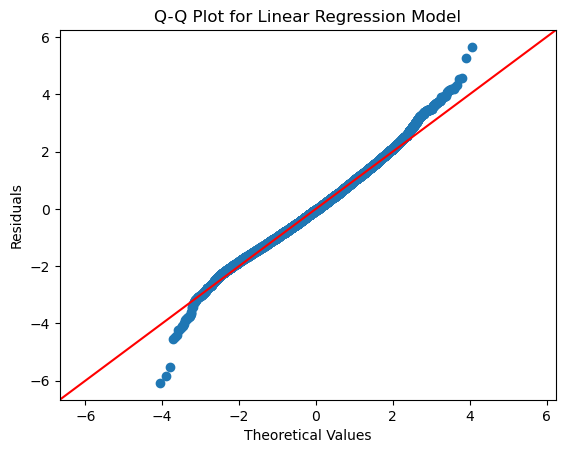

In [139]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.xlabel("Theoretical Values")
plt.ylabel("Residuals")
plt.title("Q-Q Plot for Linear Regression Model")
plt.show()

In [140]:
# Mean score
print('Mean Score: ', residuals.mean().round(4))

Mean Score:  0.0018


In [141]:
# examine
print(y_test_preds[0:20].round(1))
print(y.head(20).round(2))

[4.8 4.5 4.8 4.9 4.8 5.  4.9 4.9 5.  4.3 5.1 4.9 4.8 4.4 5.8 5.  4.4 5.5
 5.2 4.2]
0     4.86
1     4.54
2     5.19
3     3.91
4     5.39
5     4.01
6     4.09
7     4.92
8     5.74
9     4.49
10    4.56
11    3.85
12    4.78
13    4.69
14    4.17
15    5.01
16    4.82
17    4.38
18    4.50
19    4.73
Name: price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

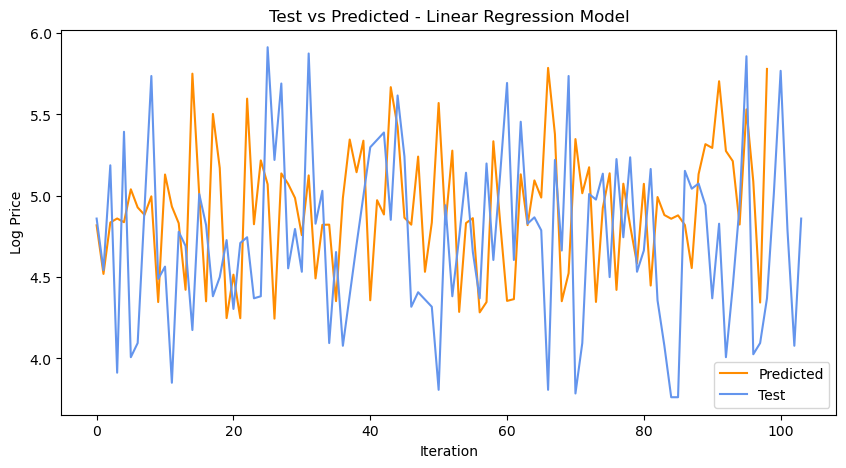

In [142]:
# Test v Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_preds[0:99], color='darkorange', label='Predicted')
plt.plot(y.head(100), color='cornflowerblue', label='Test')
plt.title('Test vs Predicted - Linear Regression Model')
plt.xlabel('Iteration')
plt.ylabel('Log Price')
plt.legend()
plt.show

In [143]:
# Random Forest Regressor

In [144]:
# Create variable for parameters
parameters = {"n_estimators": [500], "max_features": [10], "max_depth": [10]},


In [145]:
# Instantiate
forest = RandomForestRegressor(random_state=122)

In [146]:
# Gridsearch
gridsearch = GridSearchCV(forest, parameters, verbose=2, n_jobs=1)

In [147]:
# Fit model
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=  41.7s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=  39.9s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=  42.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=  39.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=  39.5s


GridSearchCV(estimator=RandomForestRegressor(random_state=122), n_jobs=1,
             param_grid=({'max_depth': [10], 'max_features': [10],
                          'n_estimators': [500]},),
             verbose=2)

In [148]:
# evaluation metrics training 
y_train_pred = gridsearch.predict(X_train)
#print("Best params: ", gridsearch.best_params_)
print("Training\nMSE: ", gridsearch.best_score_)
print("RMSE: ", (gridsearch.best_score_)**.5)
print("R-squared: ", r2_score(y_train, y_train_pred))

Training
MSE:  0.5187267278227317
RMSE:  0.7202268585818857
R-squared:  0.5279389985198216


In [149]:
# evaluation metrics testing
y_pred = gridsearch.predict(X_test)

In [150]:
print("Testing\nMSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**.5)
print("R-squared: ", r2_score(y_test, y_pred))

Testing
MSE:  0.1661361658694377
RMSE:  0.40759804448676845
R-squared:  0.5202002576726897


In [151]:
# Create importances series
imps = pd.Series(data=gridsearch.best_estimator_.feature_importances_, index=X_train.columns)


In [152]:
# Sort importances
imps_sorted = imps.sort_values(ascending=False)
print(imps_sorted)

accommodates               0.436824
room_type_Private room     0.295687
beds                       0.130199
room_type_Shared room      0.087731
City_san-francisco         0.015238
City_santa-cruz-county     0.005435
number_amenities           0.004352
City_san-diego             0.004096
City_oakland               0.003865
City_pacific-grove         0.002398
bathrooms                  0.002151
City_santa-clara-county    0.001872
City_san-mateo-county      0.001766
bedrooms                   0.001507
workspace                  0.000724
wifi                       0.000715
self_check_in              0.000664
grill                      0.000640
water                      0.000621
view                       0.000607
exercise                   0.000577
oven                       0.000548
parking                    0.000541
tv                         0.000531
dryer                      0.000503
room_type_Hotel room       0.000207
dtype: float64


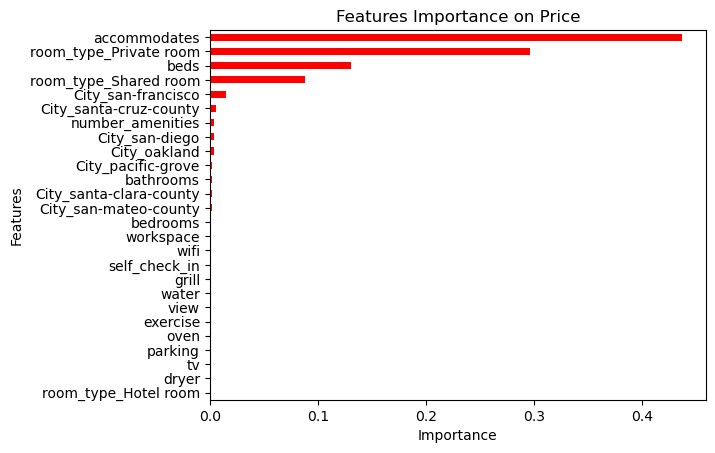

In [153]:
# Draw a horizontal barplot of importances_sorted
imps_sorted = imps.sort_values(ascending=True)
imps_sorted.plot(kind='barh', color='red')
plt.title('Features Importance on Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [154]:
# Residuals
residuals = y_test - y_pred

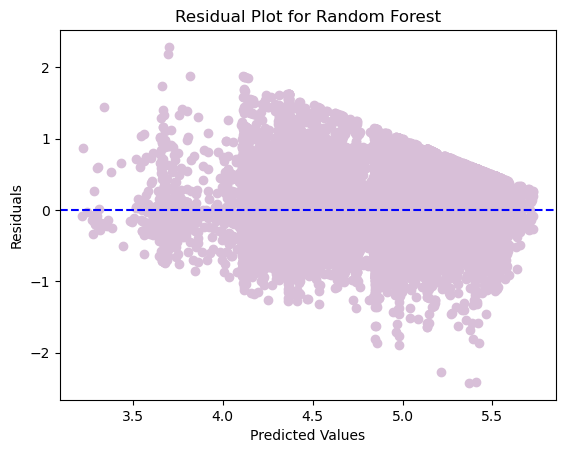

In [155]:
# Create the residual plot

plt.scatter(y_pred, residuals, c="thistle")
plt.title("Residual Plot for Random Forest")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()

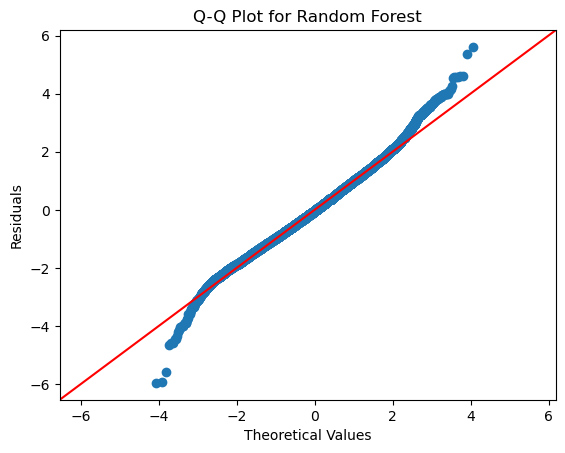

In [156]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.xlabel("Theoretical Values")
plt.ylabel("Residuals")
plt.title("Q-Q Plot for Random Forest")
plt.show()

In [157]:
# Mean score
print('Mean Score: ', residuals.mean().round(4))

Mean Score:  0.0023


In [158]:
# examine
print(y_test_preds[0:20].round(2))
print(y.head(20).round(2))

[4.82 4.52 4.84 4.86 4.84 5.04 4.93 4.88 5.   4.35 5.13 4.93 4.83 4.42
 5.75 5.01 4.35 5.5  5.17 4.25]
0     4.86
1     4.54
2     5.19
3     3.91
4     5.39
5     4.01
6     4.09
7     4.92
8     5.74
9     4.49
10    4.56
11    3.85
12    4.78
13    4.69
14    4.17
15    5.01
16    4.82
17    4.38
18    4.50
19    4.73
Name: price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

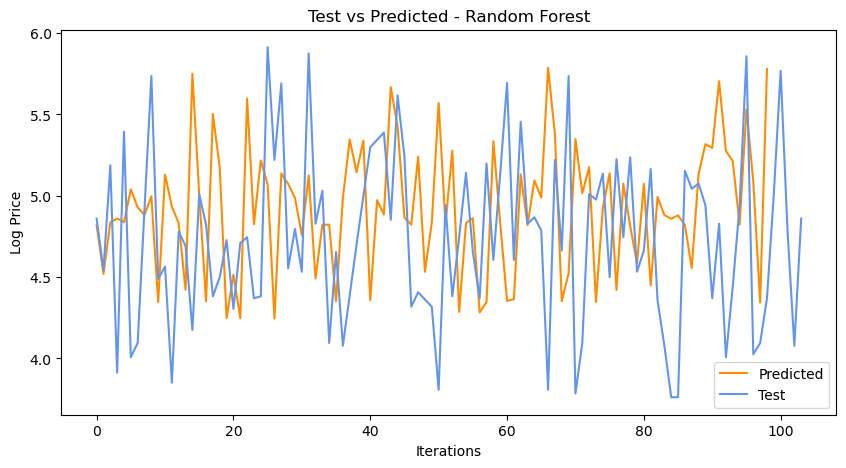

In [159]:
# Evaluation graph
plt.figure(figsize=(10,5))
plt.plot(y_test_preds[0:99], color='darkorange', label='Predicted')
plt.plot(y.head(100), color='cornflowerblue', label='Test')
plt.title('Test vs Predicted - Random Forest')
plt.xlabel('Iterations')
plt.ylabel('Log Price')
plt.legend()
plt.show